In [55]:
import pandas as pd

# Parte 0

## 1. Carga de datos

In [56]:
import pandas as pd
import ast

# Ruta del archivo noticiasTopicModeling.txt
ruta_archivo = 'noticiasTopicModeling.txt'

# Leer el archivo como una cadena de texto
with open(ruta_archivo, 'r') as file:
    noticias_texto = file.read()

# Convertir la cadena de texto a una lista de diccionarios
noticias_lista = ast.literal_eval(noticias_texto)

# Extraer los cuerpos de las noticias y crear el DataFrame
noticias = [noticia['texto'] for noticia in noticias_lista]
df = pd.DataFrame({'noticia': noticias})
df


,noticia
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...
...,...
5653,"El juez del caso Villarejo, Manuel García-Cast..."
5654,España se acerca a los 260.000 casos de COVID-...
5655,"Transferencias, préstamos y condiciones. ""Nunc..."
5656,"El 14 de marzo, ante la declaración del estado..."


## 2. Proceso de limpieza

In [57]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

def clean_token(doc):
  stops =  set(stopwords.words('spanish'))
  doc = re.sub(r'\.(?=[^\s])', '. ', doc)
  tokens = word_tokenize(doc)
  tokens = [word.lower() for word in tokens]
  tokens = [word for word in tokens if word.isalpha()]  
  tokens = [word for word in tokens if len(word) > 1]
  tokens = [word for word in tokens if word not in stops]
  return ' '.join(tokens)
  
     

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m1000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m1000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
df['noticia'] = df['noticia'].apply(clean_token)
df

,noticia
0,españa dejado ser católica decía manuel azaña ...
1,clima crispación social ceuta llegado punto pr...
2,gobierno alegado suspensión plazos derivada de...
3,puedes mandar pregunta sugerencia queja través...
4,panamá debe entregar semana corte interamerica...
...,...
5653,juez caso villarejo manuel citado investigado ...
5654,españa acerca casos confirmados inicio pandemi...
5655,transferencias préstamos condiciones nunca ue ...
5656,marzo declaración alarma decreto medidas confi...


## ¿Por qué en este caso no requerimos hacer una partición en entrenamiento, validación y prueba?
No es necesario realizar una partición en entrenamiento, validación y prueba porque no se entrenará un modelo de aprendizaje supervisado; ya que el objetivo es identificar los temas más importantes en un conjunto de datos, y no predecir una variable objetivo con base a una serie de características. En otras palabras, el presente modelo es no supervisado.

# Parte 1: Indexación semántica latente (LSI)

## 4. Encontrar la matriz TF-IDF de la columna de noticias
* Despliega los primeros 5 renglones con algunas de sus columnas con nombres, donde las columnas son los tokens.
* ¿Cuál es el significado de cada renglón?
* ¿Y el significado de cada columna?

R: Cada fila de la matriz representa una noticia y cada columna representa un token. Por lo tanto, los valores de la matriz representan la importancia de cada token en cada noticia.

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Aplica el vectorizador a la columna de noticias
tfidf_matrix = vectorizer.fit_transform(df['noticia'])

# Transforma la matriz en un dataframe
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf.head()

,aa,aaas,aac,aai,aaiún,aalla,aamir,aamma,aapp,aar,...,ניידת,על,תיעוד,الشبكة,الموصل,عين,کیان,張雨軒,赵立坚,ｖａｐｏｒｗａｖｅ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Descomposición de valores truncando la matriz TF-IDF con 10 componentes y gráfico de importancia relativa

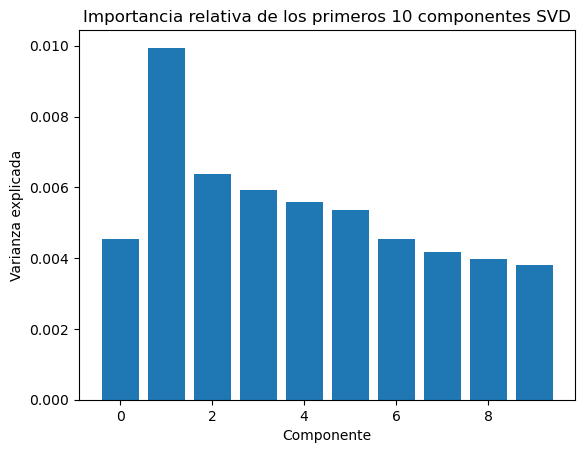

In [60]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=10, random_state=42)
svd.fit(tfidf_matrix)

plt.bar(range(10), svd.explained_variance_ratio_)
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Importancia relativa de los primeros 10 componentes SVD')
plt.show()


## 6. Matriz tokens-temas (term-topic)

In [61]:
U = svd.transform(tfidf_matrix)
S = svd.singular_values_
VT = svd.components_
df_tokens_topics = pd.DataFrame(VT, columns=vectorizer.get_feature_names_out())
df_tokens_topics.head()


,aa,aaas,aac,aai,aaiún,aalla,aamir,aamma,aapp,aar,...,ניידת,על,תיעוד,الشبكة,الموصل,عين,کیان,張雨軒,赵立坚,ｖａｐｏｒｗａｖｅ
0,0.000146,0.000031,0.000130,0.000065,0.000049,0.000096,0.000064,0.000025,0.000200,1.184283e-04,...,0.000075,0.000075,0.000075,0.000039,0.000017,0.000017,0.000060,0.000028,0.000035,0.000023
1,0.000005,0.000016,-0.000111,-0.000008,-0.000036,-0.000085,-0.000075,-0.000010,0.000239,-6.744513e-05,...,0.000141,0.000141,0.000141,-0.000070,-0.000021,-0.000021,-0.000018,-0.000025,0.000012,-0.000019
2,-0.000224,-0.000070,-0.000159,-0.000089,-0.000065,-0.000196,0.000011,-0.000076,-0.000172,-2.600934e-04,...,-0.000004,-0.000004,-0.000004,-0.000087,-0.000021,-0.000021,-0.000077,-0.000033,-0.000018,-0.000061
3,-0.000091,0.000005,0.000014,0.000194,-0.000051,-0.000033,0.000087,0.000001,-0.000257,-9.828143e-07,...,0.000015,0.000015,0.000015,-0.000007,-0.000006,-0.000006,-0.000029,-0.000017,-0.000015,-0.000018
4,0.000176,0.000027,0.000251,0.000015,0.000011,0.000290,0.000010,0.000060,0.000124,1.040061e-04,...,-0.000031,-0.000031,-0.000031,0.000142,0.000017,0.000017,0.000156,0.000032,0.000051,0.000043


## 7. Gráficos de los 10 términos/tokens más importantes
* ¿Cómo describirías cada uno de dichos conceptos latentes?

R: Los temas representan los conceptos latentes en los datos. Estos fueron generados a través del modelado de temas y los términos que los componen se seleccionan por su relevancia para el tema.

['coronavirus', 'gobierno', 'madrid', 'si', 'casos', 'pp', 'personas', 'españa', 'datos', 'pandemia']


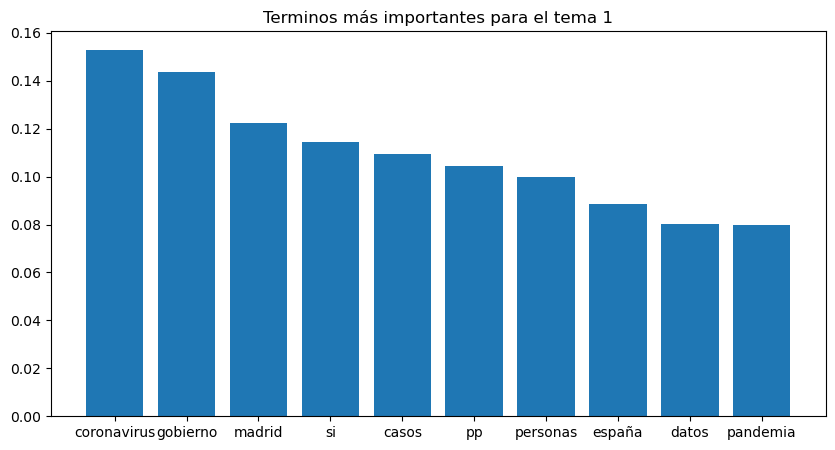

['casos', 'coronavirus', 'datos', 'municipio', 'evolución', 'pandemia', 'gráficos', 'rebrotes', 'mapas', 'provincias']


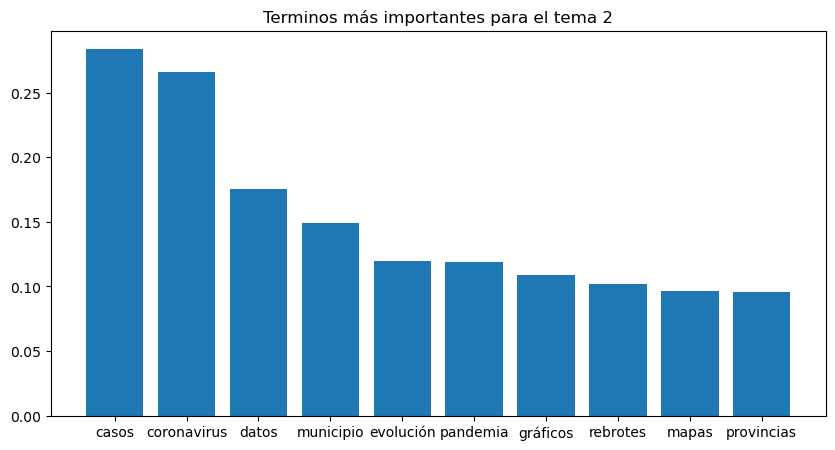

['municipio', 'pp', 'datos', 'casado', 'rebrotes', 'provincias', 'mapa', 'municipios', 'partido', 'casos']


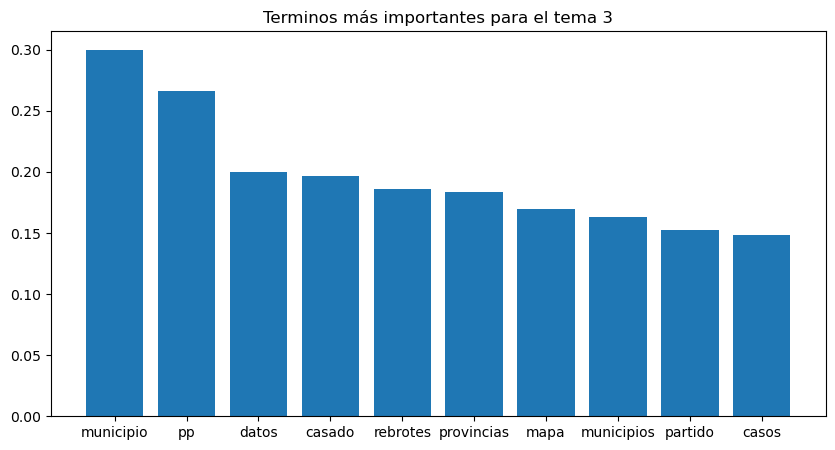

['euskadi', 'pnv', 'puedes', 'vasco', 'osakidetza', 'urkullu', 'contenidos', 'álava', 'bizkaia', 'bildu']


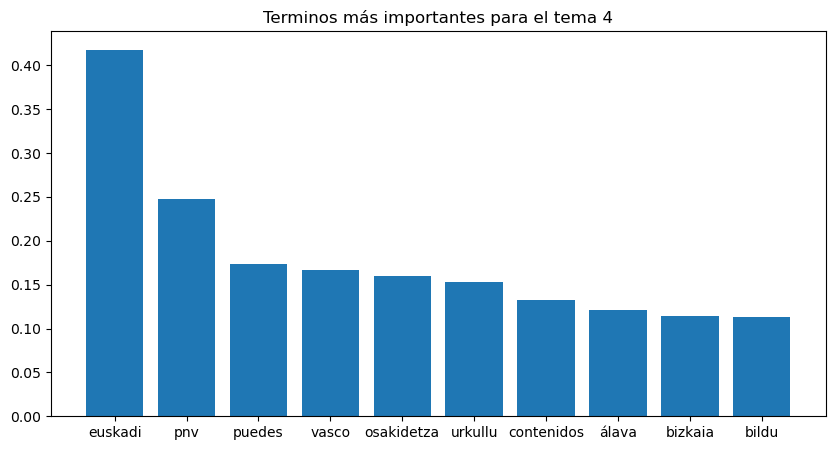

['municipio', 'villarejo', 'datos', 'rebrotes', 'policía', 'provincias', 'mapa', 'municipios', 'global', 'comisario']


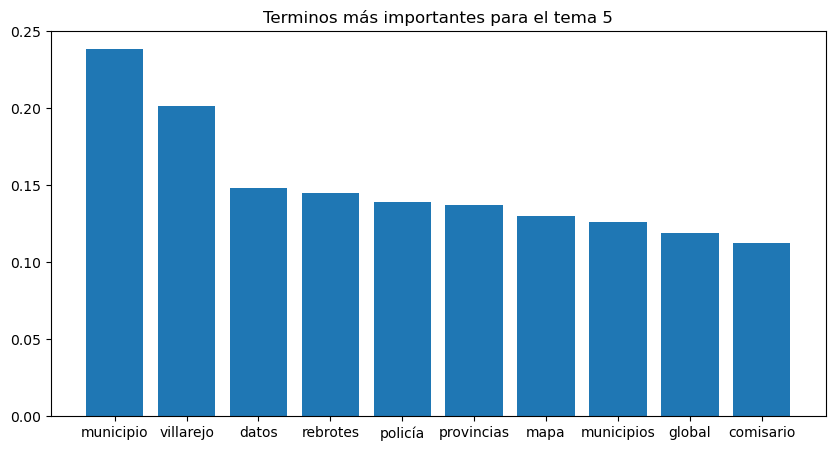

['villarejo', 'policía', 'madrid', 'comisario', 'casos', 'bárcenas', 'juez', 'sanidad', 'díaz', 'ayuso']


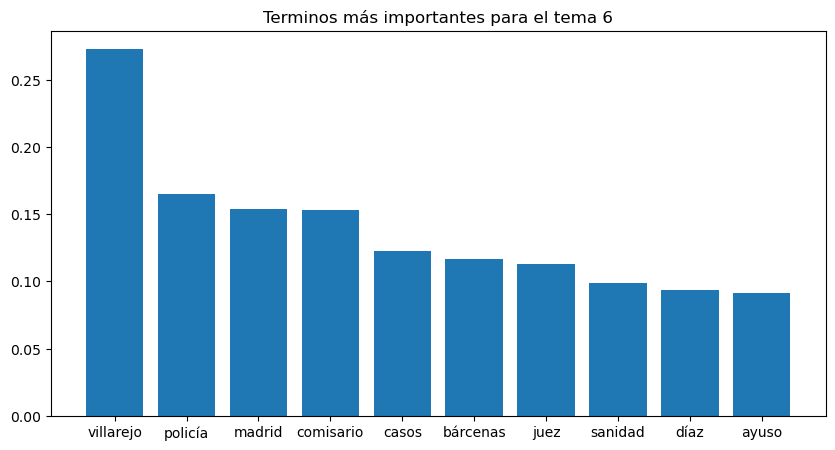

['euros', 'erte', 'montai', 'pnv', 'millones', 'empresas', 'gobierno', 'madrid', 'ayuso', 'coronavirus']


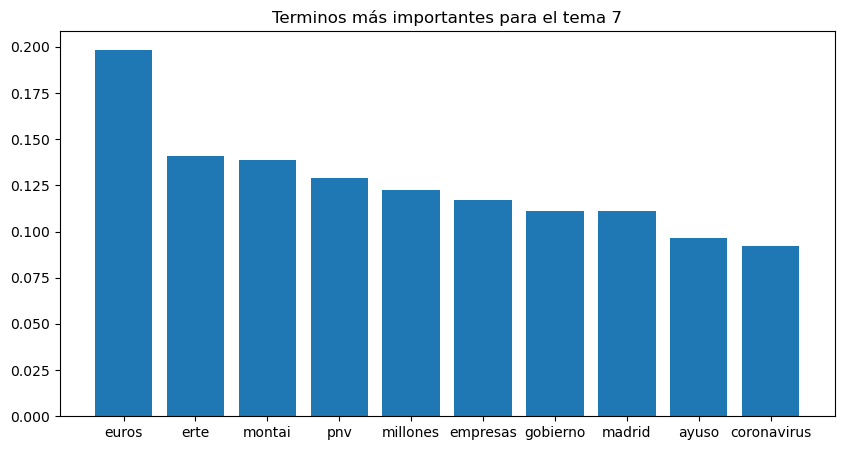

['máster', 'cifuentes', 'alumnos', 'casado', 'educación', 'universidad', 'curso', 'municipio', 'madrid', 'centros']


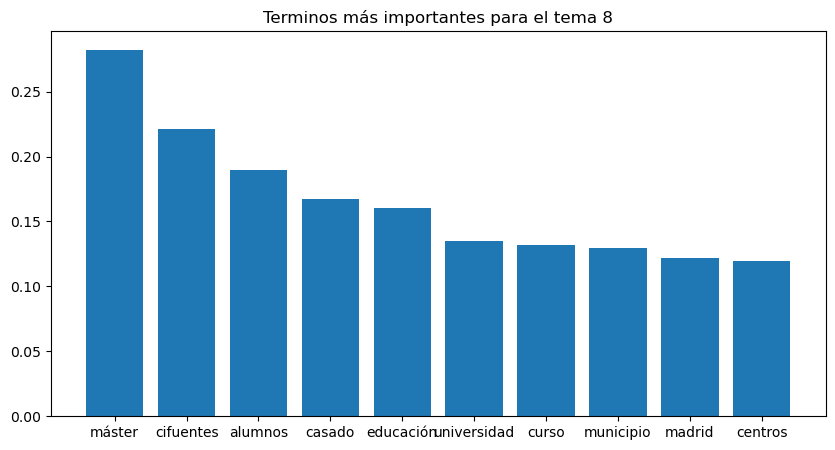

['coronavirus', 'boletín', 'información', 'hazte', 'eldiario', 'casado', 'euskadi', 'especial', 'si', 'mundo']


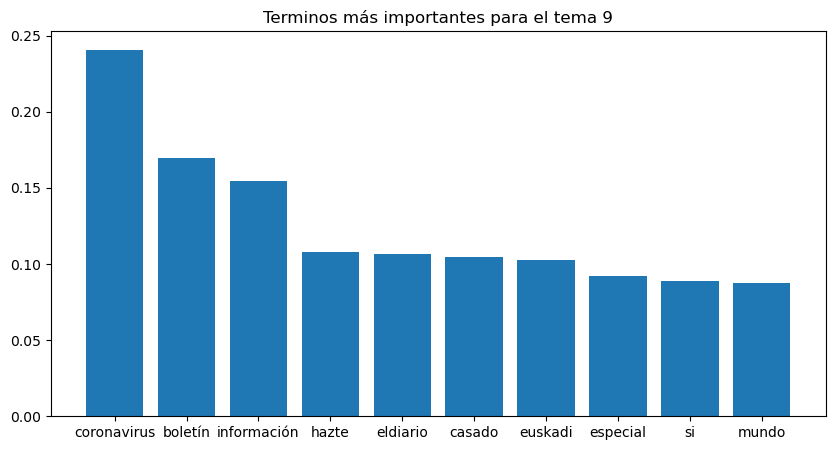

['máster', 'rey', 'casado', 'carlos', 'juan', 'cifuentes', 'millones', 'casos', 'emérito', 'universidad']


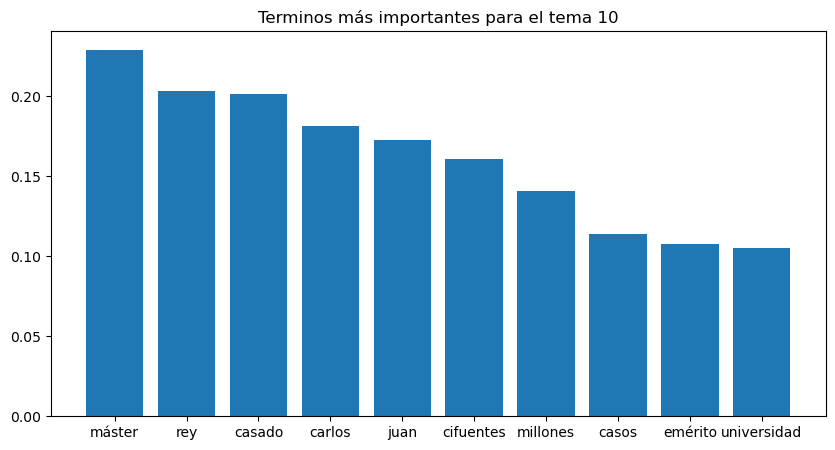

In [62]:
import numpy as np

# Numero de conceptos latentes
num_topics = 10

for i in range(num_topics):
    # Ordena los términos de cada concepto en orden descendente
    sorted_term_indexes = np.argsort(VT[i])[::-1]
    # Toma los 10 primeros términos
    top_term_indexes = sorted_term_indexes[:10]
    # Obtiene los términos correspondientes
    top_terms = [vectorizer.get_feature_names_out()[index] for index in top_term_indexes]
    # Obtiene los valores correspondientes
    top_term_values = VT[i][top_term_indexes]
    
    # Grafica los términos más importantes
    plt.figure(figsize=(10,5))
    print(top_terms)
    plt.bar(top_terms, top_term_values)
    plt.title(f'Terminos más importantes para el tema {i+1}')
    plt.show()


## 9. Resultados del ejercicio anterior
* ¿Cuántos tópicos o conceptos latentes identificas con claridad?
* ¿Cómo los describirías, es decir, de qué temáticas estarían hablando?

Con base en la lista de términos más importantes para cada tema, podría argumentarse que hay 10 temas que pueden identificarse con claridad.


* Tema 1: relacionado con el gobierno de Madrid y su respuesta a la pandemia de coronavirus.

* Tema 2: relacionado con casos de coronavirus, estadísticas y datos de la pandemia.

* Tema 3: relacionado con la pandemia y política a nivel municipal, provincias y los rebrotes.

* Tema 4: relacionado con Euskadi, la región autónoma del País Vasco, y el Partido Nacionalista Vasco (PNV).

* Tema 5: relacionado en el policía José Manuel Villarejo y cuestiones relacionadas con la policía.

* Tema 6: relacionado con Villarejo, casos judiciales y figuras políticas.

* Tema 7: relacionado con cuestiones económicas, y el Esquema de Reducción Temporal de Empleo (ERTE) implementado durante la pandemia.

* Tema 8: relacionado con la educación superior, especialmente en relación con los másteres, universidad.

* Tema 9: relacionado con noticias sobre el coronavirus.

* Tema 10: relacionado con Pablo Casado, el líder del Partido Popular (PP), y en la familia real española.

## 10. LSI con la librería Gensim

Con base a dichos valores:
* ¿Qué cantidad de tópicos sería el adecuado?
* ¿Coincide con lo que obtuviste previamente, usando la técnica SVD de manera directa?

R:
1. El número de tópicos más adecuado sería 2; ya que se obtiene un valor de coherencia de 0.44.
2. Para la técnica SVD de manera directa se utilizaron 10 temas latentes. Con LSI el mejor resultado de coherencia se obtiene con 2 temas latentes.

Los temas obtenidos podrían describirse como:

* Tema 1: relacionado con la gestión de la pantemia de coronavirus en Madrid.
* Tema 2: relacionado con términos como `pp`, `partido`, `gobierno`,`politica`,`casado` por lo que sugiere que tiene que ver con política, el Partido Popular (PP) y Pablo Casado (figura del PP). En este caso, términos como `coronavirus` tienen pesos negativos por lo que podría estar menos relacionado con la pandemia en sí.

c:\Users\m1000\anaconda3\envs\my-rdkit-env\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\m1000\anaconda3\envs\my-rdkit-env\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\m1000\anaconda3\envs\my-rdkit-env\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
c:\Users\m1000\anaconda3\envs\my-rdkit-env\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  spars

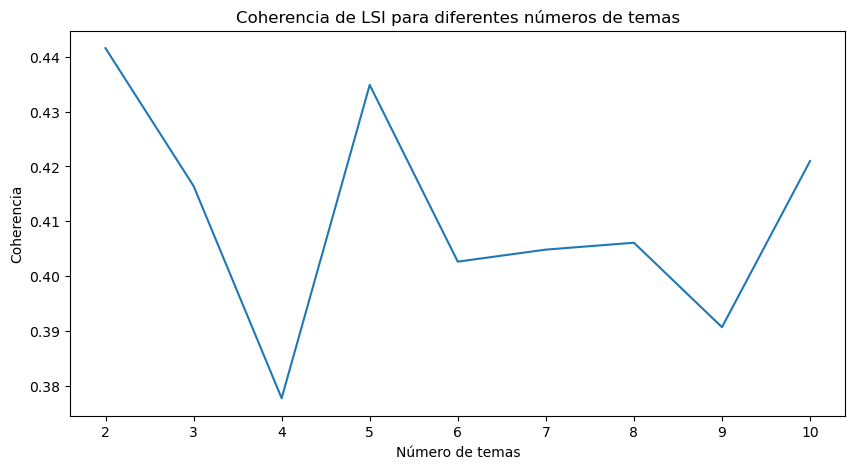

El número de temas óptimo es 2


In [63]:
from gensim import models, corpora
from gensim.models import CoherenceModel
import numpy as np

texts = df['noticia'].apply(lambda x: x.split())

# Crear diccionario
dictionary = corpora.Dictionary(texts)

# Crear un Corpus
corpus = [dictionary.doc2bow(text) for text in texts]

coherence_values = []
lsi_models = []

for num_topics in range(2, 11):
    # Crear y entrenar el modelo LSI
    lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=num_topics)
    
    # Calcular el valor de coherencia
    cm = CoherenceModel(model=lsi, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(cm.get_coherence())

# Graficar los valores de coherencia
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), coherence_values)
plt.xlabel("Número de temas")
plt.ylabel("Coherencia")
plt.title("Coherencia de LSI para diferentes números de temas")
plt.show()

# Mostrar el número de temas que maximiza la coherencia
print(f"El número de temas óptimo es {np.argmax(coherence_values) + 2}")


In [71]:
np.max(coherence_values)

0.44158500248250243

c:\Users\m1000\anaconda3\envs\my-rdkit-env\Lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


[('si', 0.24349146039413982), ('gobierno', 0.21092935810669952), ('coronavirus', 0.15579016542060148), ('personas', 0.15045544679031372), ('ser', 0.13806165826273223), ('dos', 0.13702155130917218), ('años', 0.13547666897480726), ('españa', 0.12651217386214472), ('madrid', 0.12348400087387496), ('caso', 0.10912198978594669)]


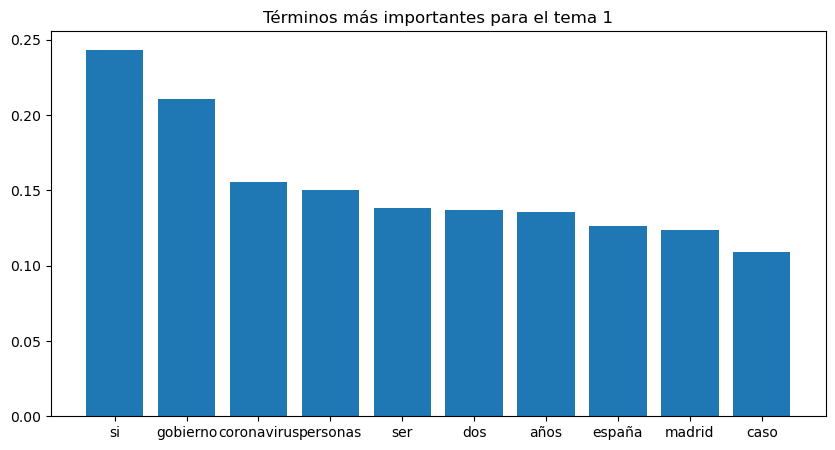

[('coronavirus', -0.2778772662971615), ('casos', -0.27208288935304253), ('pp', 0.26602271326858057), ('partido', 0.19221344047821384), ('personas', -0.18888142033932356), ('gobierno', 0.1848429524959429), ('síntomas', -0.13389316703324716), ('política', 0.12663250162524414), ('cada', -0.12509141496880105), ('casado', 0.11135570763202161)]


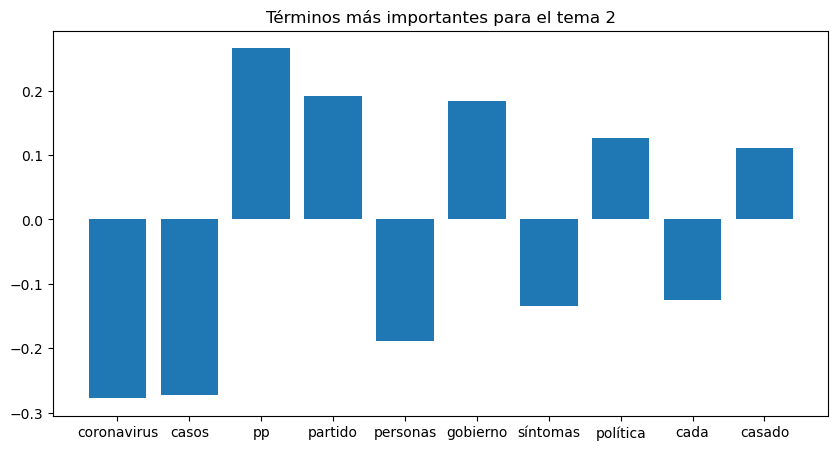

In [75]:
import matplotlib.pyplot as plt

# Numero de conceptos latentes
num_topics = 2

# Crear y entrenar el modelo LSI
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=num_topics)

for i in range(num_topics):
    # Obtiene los términos y sus pesos para el tópico
    terms = lsi.show_topic(i, topn=10)
    print(terms)
    # Separa los términos y los pesos en dos listas
    top_terms = [term for term, weight in terms]
    top_term_values = [weight for term, weight in terms]
    
    # Grafica los términos más importantes
    plt.figure(figsize=(10,5))
    plt.bar(top_terms, top_term_values)
    plt.title(f'Términos más importantes para el tema {i+1}')
    plt.show()


# Parte 2. Asignación de Dirichlet Latente (LDA)

## 11. LDA con la librería Gensim

In [64]:
from gensim.models import LdaMulticore

# Ajustaremos varios modelos LDA con una cantidad diferente de temas
lda_models = []
for num_topics in range(2, 11):
    lda = LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=2, workers=2)
    lda_models.append(lda)


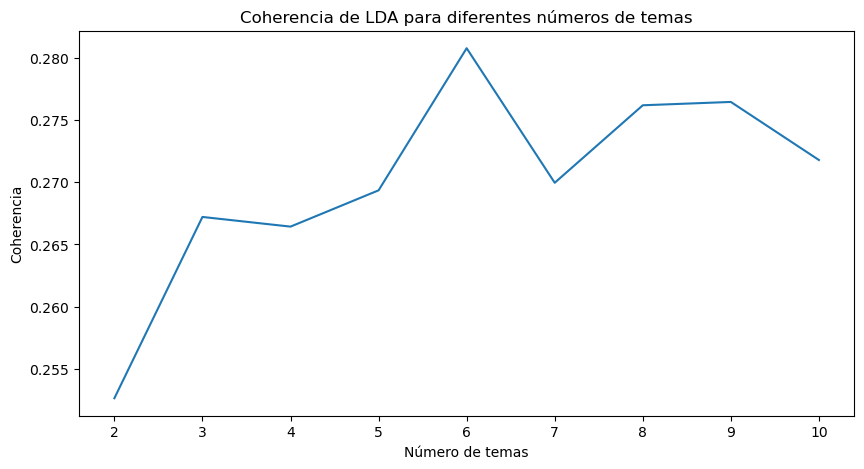

El número de temas óptimo para LDA es 6


In [65]:
coherence_values_lda = []

for num_topics in range(2, 11):
    # Calculamos el valor de coherencia para cada modelo LDA
    cm = CoherenceModel(model=lda_models[num_topics-2], texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values_lda.append(cm.get_coherence())

# Graficamos los valores de coherencia
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), coherence_values_lda)
plt.xlabel("Número de temas")
plt.ylabel("Coherencia")
plt.title("Coherencia de LDA para diferentes números de temas")
plt.show()

# Mostramos el número de temas que maximiza la coherencia
print(f"El número de temas óptimo para LDA es {np.argmax(coherence_values_lda) + 2}")


In [72]:
np.max(coherence_values_lda)

0.2807700403532669

[('gobierno', 0.0040383064), ('madrid', 0.0030553476), ('si', 0.0030477287), ('ser', 0.0027393398), ('parte', 0.0025617732), ('españa', 0.0025424187), ('coronavirus', 0.0025227861), ('personas', 0.0025191538), ('años', 0.0024278776), ('dos', 0.0023196095)]


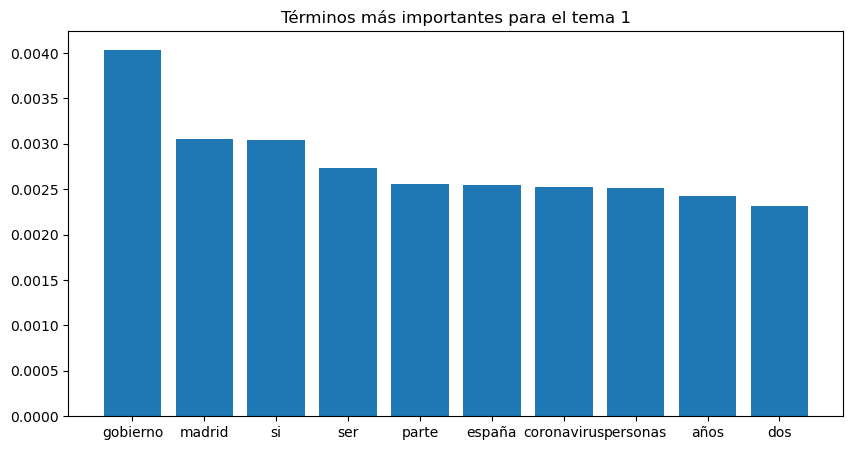

[('si', 0.005552414), ('madrid', 0.0046254257), ('gobierno', 0.004026566), ('dos', 0.0032165481), ('años', 0.002772112), ('ser', 0.002655236), ('coronavirus', 0.002604874), ('ahora', 0.002587383), ('cada', 0.0025600013), ('personas', 0.0024039547)]


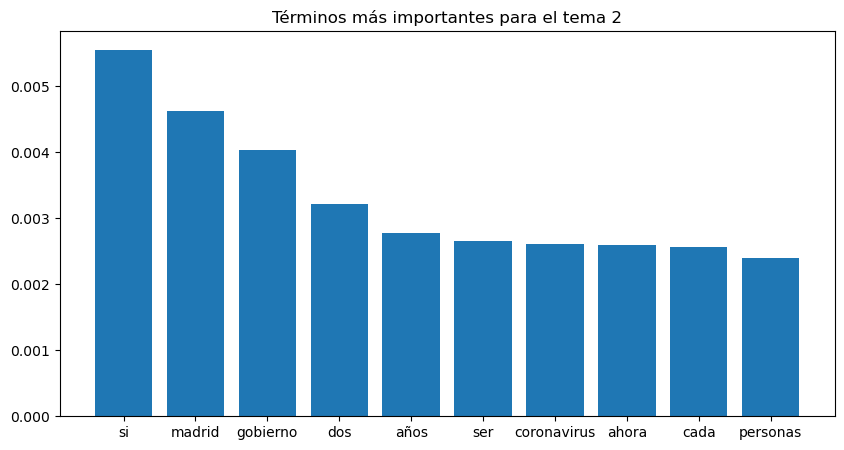

[('coronavirus', 0.005440553), ('personas', 0.0049992856), ('casos', 0.0049120397), ('si', 0.0040368084), ('gobierno', 0.0035709974), ('años', 0.0031176885), ('dos', 0.0030044715), ('según', 0.0027262496), ('españa', 0.0026327646), ('pandemia', 0.0026029015)]


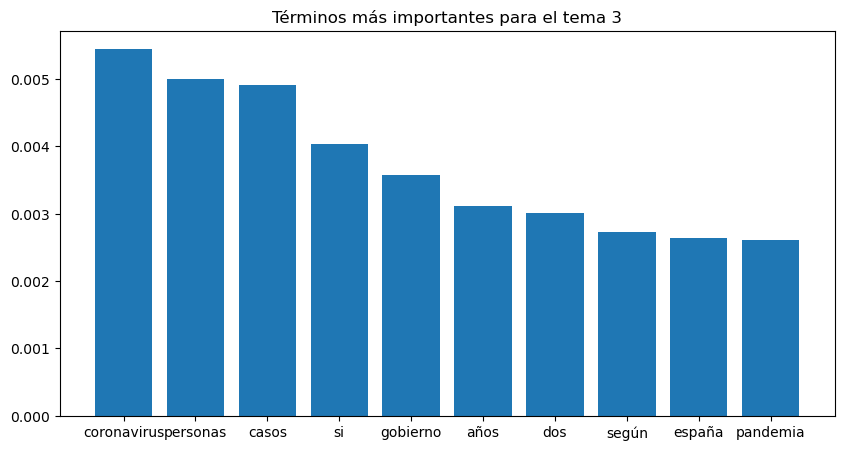

[('gobierno', 0.006144978), ('si', 0.0038062134), ('dos', 0.0028889163), ('pp', 0.0028133122), ('años', 0.002780211), ('partido', 0.0025552346), ('ser', 0.0025277329), ('personas', 0.0024542052), ('parte', 0.0024106442), ('política', 0.0023939062)]


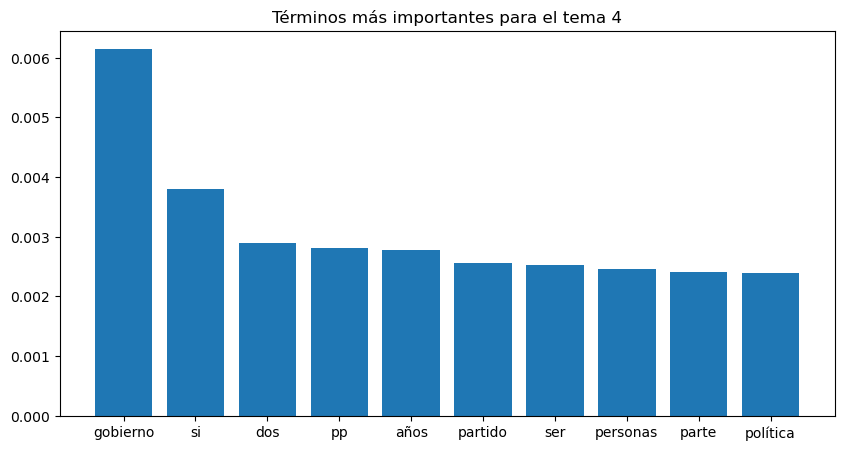

[('si', 0.0037067954), ('gobierno', 0.0031680383), ('años', 0.003112301), ('ser', 0.0027262827), ('según', 0.0026688138), ('solo', 0.002495033), ('etiquetas', 0.0024629852), ('coronavirus', 0.0023438332), ('madrid', 0.002288841), ('dos', 0.0022258295)]


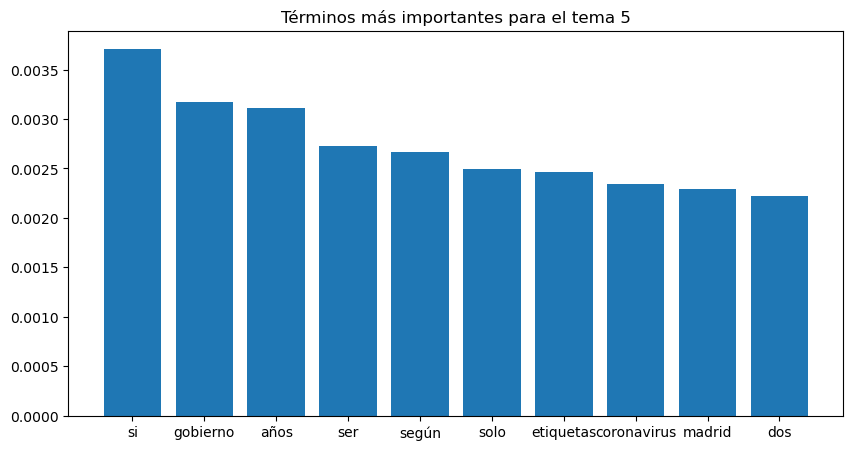

[('si', 0.0033987665), ('años', 0.0029484988), ('pp', 0.0029268255), ('dos', 0.0029226772), ('gobierno', 0.0026449275), ('españa', 0.0023779012), ('según', 0.0023262159), ('así', 0.002319927), ('etiquetas', 0.002305861), ('ser', 0.002236157)]


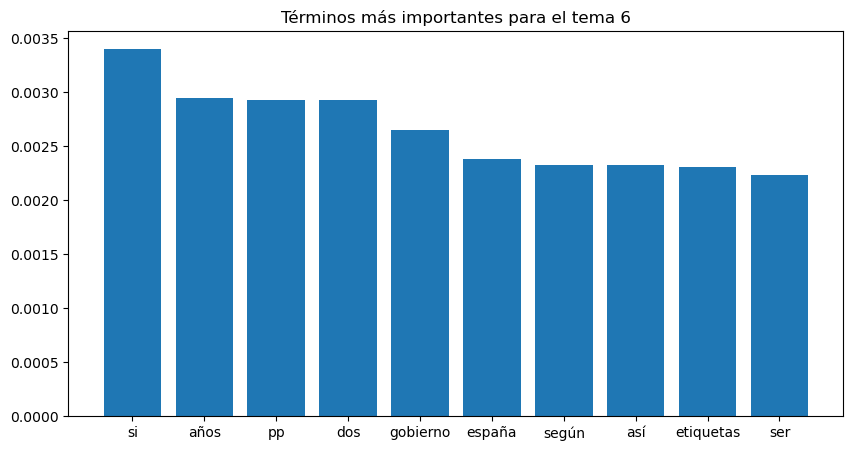

In [77]:
import matplotlib.pyplot as plt

# Número de temas
num_topics = 6

# Selección del modelo óptimo
lda_optimal = lda_models[np.argmax(coherence_values_lda)]

for i in range(num_topics):
    # Obtiene los términos y sus pesos para el tópico
    terms = lda_optimal.show_topic(i, topn=10)
    print(terms)
    # Separa los términos y los pesos en dos listas
    top_terms = [term for term, weight in terms]
    top_term_values = [weight for term, weight in terms]
    
    # Grafica los términos más importantes
    plt.figure(figsize=(10,5))
    plt.bar(top_terms, top_term_values)
    plt.title(f'Términos más importantes para el tema {i+1}')
    plt.show()


Tema 1: relacionado con el gobierno de Madrid y su gestión de la crisis del coronavirus en España, y como ha afectado a diversas personas y aspectos durante los últimos años.

Tema 2: relacionado la situación del coronavirus en Madrid, las decisiones tomadas por el gobierno y su impacto en la población durante los últimos años.

Tema 3: relacionado con la pandemia del coronavirus, enfocándose en el número de casos, el impacto en la población, y la respuesta del gobierno en España durante los últimos años.

Tema 4: relacionado con la política del gobierno, en particular el Partido Popular (PP), y su impacto en la sociedad y las personas durante los últimos años.

Tema 5: relacionado con los acontecimientos en España bajo la gestión del gobierno durante los últimos años, incluyendo la crisis del coronavirus y la situación en Madrid.

Tema 6: relacionado con la política del Partido Popular (PP) en España durante los últimos años, con discusiones y debates en torno a diversos temas y decisiones.

## 12. Cantidad de tópicos con LDA
Con base a esta técnica:
* ¿Qué cantidad de tópicos consideras que es la más adecuada?

Compara tus resutlados con el métodos LSI:
* ¿Qué encuentras de coincidencias y diferencias?
* ¿Cuál consideras puede ser el mejor resultadao, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?

R:
1. Con base a la técnica (LDA), calculando el valor de coherencia para cada modelo, el número de temas óptimo es 6. El valor máximo de coherencia con LDA y 6 temas es 0.28
2. Podría argumentarse que utilizar 2 temas podría ser lo más adecuado ya que se obtiene una valor mayor de congruencia. Asimismo, una análisis manual de los términos relacionados con cada tema pareciera indicar que es posible clasificar las noticias en `política` y `coronavirus`. Dependiendo del nivel de detalle o subclasificaciones podrían incluirse un número mayor de temas latentes.

In [66]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Seleccionamos el modelo con el número óptimo de temas
optimal_lda = lda_models[np.argmax(coherence_values_lda)]

# Preparamos los resultados para la visualización
lda_display = gensimvis.prepare(optimal_lda, corpus, dictionary, sort_topics=True)

# Visualizamos los temas
pyLDAvis.display(lda_display)
